# Step 1: Notebook Setup

The cell below contains a number of helper functions used throughout this walkthrough. They are mainly wrappers around existing `matplotlib` functionality and are provided for the sake of simplicity in the steps to come.

If you are familiar with `matplotlib`, feel free to alter the functions as you please.

## TODOs

1. Click in the cell below and run the cell.

In [84]:
# TODO: Make sure you run this cell before continuing!

%matplotlib inline
import matplotlib.pyplot as plt

def show_plot(x_data, y_data, x_label, y_label):
    plt.figure(figsize=(10,5), dpi=100)
    plt.plot(x_data, y_data, 'b-', marker='|', markersize=2.0, mfc='b')
    plt.grid(b=True, which='major', color='k', linestyle='-')
    plt.xlabel(x_label)
    plt.ylabel (y_label)
    plt.show()
    
def plot_box(bbox):
    min_lon, min_lat, max_lon, max_lat = bbox.bounds
    import matplotlib.pyplot as plt1
    from matplotlib.patches import Polygon
    from mpl_toolkits.basemap import Basemap

    map = Basemap()
    map.bluemarble(scale=0.5)
    poly = Polygon([(min_lon,min_lat),(min_lon,max_lat),(max_lon,max_lat),(max_lon,min_lat)],facecolor=(0,0,0,0.0),edgecolor='green',linewidth=2)
    plt1.gca().add_patch(poly)
    plt1.gcf().set_size_inches(10,15)
    
    plt1.show()
    
def show_plot_two_series(x_data_a, x_data_b, y_data_a, y_data_b, x_label, y_label_a, y_label_b, series_a_label, series_b_label):
#     plt.figure(figsize=(10,5), dpi=100)
    fig, ax1 = plt.subplots(figsize=(10,5), dpi=100)
    series_a, = ax1.plot(x_data_a, y_data_a, 'b-', marker='|', markersize=2.0, mfc='b', label=series_a_label)
    ax1.set_ylabel(y_label_a, color='b')
    ax1.tick_params('y', colors='b')
    ax1.set_ylim(min(0, *y_data_a), max(y_data_a)+.1*max(y_data_a))
    ax1.set_xlabel(x_label)
    
    ax2 = ax1.twinx()
    series_b, = ax2.plot(x_data_b, y_data_b, 'r-', marker='|', markersize=2.0, mfc='r', label=series_b_label)
    ax2.set_ylabel(y_label_b, color='r')
    ax2.set_ylim(min(0, *y_data_b), max(y_data_b)+.1*max(y_data_b))
    ax2.tick_params('y', colors='r')
    
    plt.grid(b=True, which='major', color='k', linestyle='-')
#     plt.xlabel(x_label)
#     plt.ylabel (y_label)
    plt.legend(handles=(series_a, series_b), bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.)
    plt.show()


# Step 2: List available Datasets

Now we can interact with NEXUS using the `nexuscli` python module. The `nexuscli` module has a number of useful methods that allow you to easily interact with the NEXUS webservice API. One of those methods is `nexuscli.dataset_list` which returns a list of Datasets in the system along with their start and end times.

However, in order to use the client, it must be told where the NEXUS webservice is running. The `nexuscli.set_target(url)` method is used to target NEXUS. An instance of NEXUS is already running for you and is available at `http://nexus-webapp:8083`.

## TODOs

1. Import the `nexuscli` python module.
2. Call `nexuscli.dataset_list()` and inspect the results

In [4]:
# TODO: Import the nexuscli python module.
import nexuscli

# Target the nexus webapp server
nexuscli.set_target("http://nexus-webapp:8083")

# TODO: Call nexuscli.dataset_list() and inspect the results
nexuscli.dataset_list()

[OrderedDict([('shortName', 'AVHRR_OI_L4_GHRSST_NCEI'),
              ('start', '2016-01-01T00:00:00Z'),
              ('end', '2017-07-06T00:00:00Z')]),
 OrderedDict([('shortName', 'MEASURES_SLA_JPL_1603'),
              ('start', '2016-01-05T12:00:00Z'),
              ('end', '2016-05-14T12:00:00Z')])]

# Step 3: Run a Time Series

Now that we can interact with NEXUS using the `nexuscli` python module, we would like to run a time series. To do this, we will use the `nexuscli.time_series` method. The signature for this method is described below:

```
Signature: nexuscli.time_series(datasets, bounding_box, start_datetime, end_datetime, seasonal_filter=False, lowpass_filter=False, spark=False)
Docstring:
Send a request to NEXUS to calculate a time series.

Send a request to NEXUS to calculate a time series.
    
:param datasets: Sequence (max length 2) of the name of the dataset(s)
:type datasets: iterable
:param bounding_box: Bounding box for area of interest
:type bounding_box: shapely.geometry.polygon.Polygon
:param start_datetime: Start time
:type start_datetime: datetime
:param end_datetime: End time
:type end_datetime: datetime

:return: List of nexuscli.TimeSeries namedtuples
:rtype: list
```

As you can see, there are a number of options available. Try generating a time series for the `AVHRR_OI_L4_GHRSST_NCEI` dataset for the time period 2016-01-01 through 2016-12-31 and a bounding box `-150, 45, -120, 60` (west, south, east, north).

## TODOs

1. Create the bounding box using shapely's `box` method
2. Plot the bounding box using the `plot_box` helper method
3. Call the `time_series method`
4. Plot the result using the `show_plot` helper method

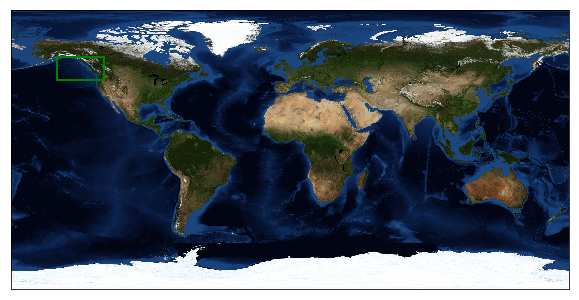

In [86]:
import nexuscli
from datetime import datetime

from shapely.geometry import box

# TODO: Create a bounding box using the box method imported above
bbox = box(-150, 45, -120, 60)

# TODO: Plot the bounding box using the helper method plot_box
plot_box(bbox)

# TODO: Call the time_series method for the AVHRR_OI_L4_GHRSST_NCEI dataset using 
# your bounding box and time period 2016-01-01 through 2016-12-31
datasets = ["AVHRR_OI_L4_GHRSST_NCEI"]
start_time = datetime(2016, 1, 1)
end_time = datetime(2016, 12, 31)
ts = nexuscli.time_series(datasets, bbox, start_time, end_time)


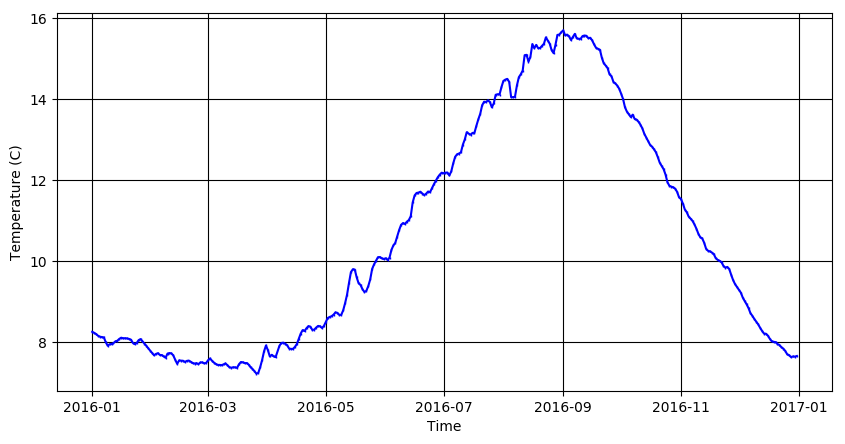

In [6]:
# TODO: Plot the result using the `show_plot` helper method
avhrr_ts = ts[0]
show_plot(avhrr_ts.time, avhrr_ts.mean, 'Time', 'Temperature (C)')

# Step 4: Run two Time Series' and plot them side-by-side

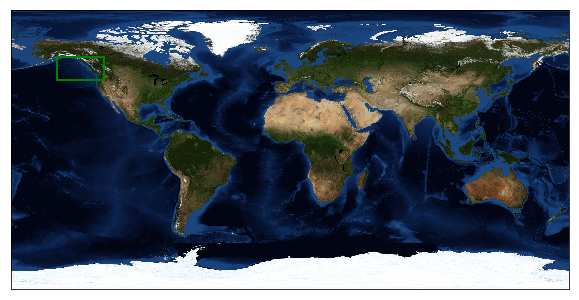

In [89]:
import nexuscli
from datetime import datetime

from shapely.geometry import box

# TODO: Create a bounding box using the box method imported above
bbox = box(-150, 45, -120, 60)

# TODO: Plot the bounding box using the helper method plot_box
plot_box(bbox)

# TODO: Call the time_series method for the AVHRR_OI_L4_GHRSST_NCEI dataset using 
# your bounding box and time period 2016-01-01 through 2016-12-31
datasets = ["AVHRR_OI_L4_GHRSST_NCEI", "MEASURES_SLA_JPL_1603"]
start_time = datetime(2016, 1, 1, 0, 0, 0)
end_time = datetime(2016, 5, 10, 23, 59, 59)


start = 0

#TDODO run time series here
ts2 = nexuscli.time_series(datasets, bbox, start_time, end_time)

end = 0

print end - start


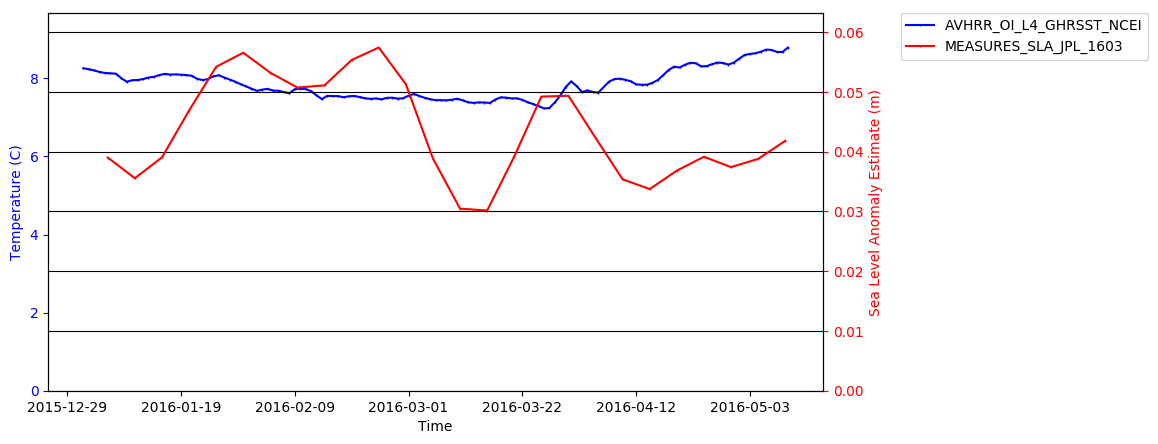

In [90]:
# TODO: Plot the result using the `show_plot_two_series` helper method
series_a, series_b = ts2
show_plot_two_series(
    series_a.time, series_b.time, 
    series_a.mean, series_b.mean, 
    'Time', 'Temperature (C)', 'Sea Level Anomaly Estimate (m)',
    series_a.dataset, series_b.dataset
)

# Step 5: Run a Daily Difference Average (Anomoly) calculation